<a href="https://colab.research.google.com/github/mohanpartha/ML_preprocessing/blob/master/Sk_Learn_Pipeline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
train_df = pd.read_csv('/content/drive/My Drive/data/House_Prices/train.csv',sep=',')
submission_df = pd.read_csv('/content/drive/My Drive/data/House_Prices/sample_submission.csv',sep=',')
test_df = pd.read_csv('/content/drive/My Drive/data/House_Prices/test.csv',sep=',')

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_df, valid_df = train_test_split(train_df, test_size=0.15, random_state=48)

In [9]:
y_train = train_df[["SalePrice"]]
y_valid = valid_df[["SalePrice"]]
train_df.drop(columns=["SalePrice"], inplace=True)
valid_df.drop(columns=["SalePrice"], inplace=True)

In [10]:
def get_na_columns(df, na_threshold=0.4):
    discard_cols = []
    for col in df.columns:
        na_ratio = sum(pd.isna(df[col])) / len(df)
        if na_ratio > na_threshold:
            discard_cols.append(col)
    return discard_cols

In [11]:
discard_cols = get_na_columns(train_df, na_threshold=0.4)
discard_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
train_df = train_df.drop(columns=discard_cols)
valid_df = valid_df.drop(columns=discard_cols)
test_df = test_df.drop(columns=discard_cols)

In [13]:
def get_features(df, excl_cols=None):
    num_features = []
    cat_features = []
    for col in df.columns:
        if excl_cols is not None and col in excl_cols:
            continue
        if df[col].dtype == "object":
            cat_features.append(col)
        else:
            num_features.append(col)
    return num_features, cat_features

In [14]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1141,1142,60,RL,NaN,10304,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,2Story,5,7,1976,1976,Gable,CompShg,Plywood,Plywood,BrkFace,44.0,TA,Gd,CBlock,TA,TA,No,ALQ,381,Unf,0,399,780,GasA,Ex,Y,SBrkr,1088,780,0,1868,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,1976.0,Unf,2,484,TA,TA,Y,448,96,0,0,0,0,0,10,2009,WD,Normal
999,1000,20,RL,64.0,6762,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,24.0,Gd,TA,PConc,Gd,TA,Av,GLQ,686,Unf,0,501,1187,GasA,Ex,Y,SBrkr,1208,0,0,1208,1,0,2,0,2,1,Gd,6,Typ,0,Attchd,2006.0,RFn,2,632,TA,TA,Y,105,61,0,0,0,0,0,2,2010,WD,Normal
1239,1240,20,RL,64.0,9037,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,32.0,Gd,TA,PConc,Gd,TA,Av,GLQ,428,Unf,0,1048,1476,GasA,Ex,Y,SBrkr,1484,0,0,1484,0,0,2,0,2,1,Ex,6,Typ,1,Attchd,2006.0,RFn,2,472,TA,TA,Y,120,33,0,0,0,0,0,12,2007,WD,Normal
735,736,75,RM,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,7,1914,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,390,Unf,0,490,880,GasW,Fa,N,SBrkr,880,888,0,1768,0,0,1,1,2,1,TA,6,Typ,2,Detchd,1914.0,Unf,2,320,TA,TA,N,0,341,0,0,0,0,0,10,2006,WD,Normal
1162,1163,20,RL,109.0,8724,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1968,1968,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,BLQ,492,Unf,0,402,894,GasA,Gd,Y,SBrkr,894,0,0,894,0,0,1,0,3,1,TA,5,Typ,1,Attchd,1968.0,Fin,2,450,TA,TA,Y,0,0,0,0,0,0,0,5,2007,WD,Normal


In [15]:
num_features, cat_features = get_features(train_df, excl_cols=["Id", "SalePrice"])

In [16]:
num_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [17]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [18]:
preprocess_fn = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [19]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1141,1142,60,RL,NaN,10304,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,2Story,5,7,1976,1976,Gable,CompShg,Plywood,Plywood,BrkFace,44.0,TA,Gd,CBlock,TA,TA,No,ALQ,381,Unf,0,399,780,GasA,Ex,Y,SBrkr,1088,780,0,1868,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,1976.0,Unf,2,484,TA,TA,Y,448,96,0,0,0,0,0,10,2009,WD,Normal
999,1000,20,RL,64.0,6762,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,24.0,Gd,TA,PConc,Gd,TA,Av,GLQ,686,Unf,0,501,1187,GasA,Ex,Y,SBrkr,1208,0,0,1208,1,0,2,0,2,1,Gd,6,Typ,0,Attchd,2006.0,RFn,2,632,TA,TA,Y,105,61,0,0,0,0,0,2,2010,WD,Normal
1239,1240,20,RL,64.0,9037,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,32.0,Gd,TA,PConc,Gd,TA,Av,GLQ,428,Unf,0,1048,1476,GasA,Ex,Y,SBrkr,1484,0,0,1484,0,0,2,0,2,1,Ex,6,Typ,1,Attchd,2006.0,RFn,2,472,TA,TA,Y,120,33,0,0,0,0,0,12,2007,WD,Normal
735,736,75,RM,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,7,1914,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,390,Unf,0,490,880,GasW,Fa,N,SBrkr,880,888,0,1768,0,0,1,1,2,1,TA,6,Typ,2,Detchd,1914.0,Unf,2,320,TA,TA,N,0,341,0,0,0,0,0,10,2006,WD,Normal
1162,1163,20,RL,109.0,8724,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1968,1968,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,BLQ,492,Unf,0,402,894,GasA,Gd,Y,SBrkr,894,0,0,894,0,0,1,0,3,1,TA,5,Typ,1,Attchd,1968.0,Fin,2,450,TA,TA,Y,0,0,0,0,0,0,0,5,2007,WD,Normal


In [20]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [22]:
preprocess_fn.fit(train_df)
X_train = preprocess_fn.transform(train_df)
X_valid = preprocess_fn.transform(valid_df)
X_test = preprocess_fn.transform(test_df)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
model = RandomForestRegressor(n_estimators=300, min_samples_leaf=5)

In [30]:
model.fit(X_train, np.ravel(y_train))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

21376.92859108626

In [32]:
np.sqrt(mean_squared_error(y_valid, model.predict(X_valid)))

25470.752467603925

In [33]:
X_train.shape

(1241, 279)

In [34]:
import torch
from torch import nn
import torch.nn.functional as F

In [36]:
def create_model(input_dim):
    net = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ELU(),
        nn.Dropout(0.25),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ELU(),
        nn.Dropout(0.4),
        nn.BatchNorm1d(32),
        nn.Linear(32, 1),
    )
    return net

In [37]:
def evaluate_dl(model, dl, device):
    criterion = torch.nn.MSELoss(reduction='mean')
    loss_values = []
    n = 0
    model.eval()
    for inputs, labels in dl:
        inputs, labels = inputs.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(inputs)
            loss = criterion(preds, labels)
        loss_values.append(loss.item() * len(labels))
        n += len(labels)
    return np.sqrt(np.sum(loss_values)/n)

In [38]:
def train(model, train_dl, valid_dl, epochs, device):
    
    model = model.to(device)
    optim = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss(reduction='mean')
    best_loss = 9999999
    best_state = model.state_dict()
    for epoch in range(epochs):
        loss_values = []
        n = 0
        model.train()
        for idx, (inputs, labels) in enumerate(train_dl, 1):
            inputs, labels = inputs.to(device), labels.to(device)
            preds = model(inputs)
            loss = criterion(preds, labels)
#             import pdb;pdb.set_trace()
#             print(preds.shape, labels.shape)
            optim.zero_grad()
            loss.backward()
            optim.step()
            loss_values.append(loss.item() * len(labels))
            n += len(labels)
        
        if epoch % 50 == 0:
            train_loss = np.sqrt(np.sum(loss_values)/n)
            val_loss = evaluate_dl(model, valid_dl, device)
            if val_loss < best_loss:
                best_loss = val_loss
                print("Saving best model...")
                best_state = model.state_dict()
            print(f"Epoch: {epoch}, Train Loss: {train_loss}, Valid Loss: {val_loss}")
            
    model.load_state_dict(best_state)
    return model

In [39]:
X_train = X_train.todense()
X_valid = X_valid.todense()
X_test = X_test.todense()
y_train = y_train.values
y_valid = y_valid.values

In [40]:
y_train_scaled = y_train / 1000
y_valid_scaled = y_valid / 1000

(array([122., 625., 308., 116.,  43.,  18.,   2.,   3.,   2.,   2.]),
 array([ 34.9 , 106.91, 178.92, 250.93, 322.94, 394.95, 466.96, 538.97,
        610.98, 682.99, 755.  ]),
 <a list of 10 Patch objects>)

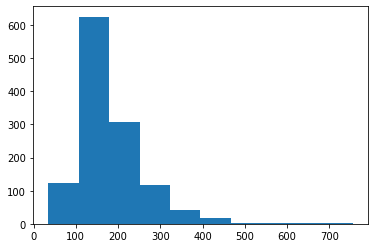

In [44]:
plt.hist(y_train_scaled)

In [45]:
bs = 512
device = torch.device('cuda:0')

train_ds = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), 
                                          torch.from_numpy(y_train_scaled).float())
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_ds = torch.utils.data.TensorDataset(torch.from_numpy(X_valid).float(), 
                                          torch.from_numpy(y_valid_scaled).float())
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=bs, shuffle=False)

In [46]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model = create_model(input_dim=279)
model = train(model, train_dl, valid_dl, epochs=2000, device=device)